#### Load Data

In [2]:
import numpy as np

# Loading data stored from Gridsearch process
# Train Data
X_train = np.genfromtxt('./data/Spambase_X_train.csv', delimiter=',')
# Test Data
X_test = np.genfromtxt('./data/Spambase_X_test.csv', delimiter=',')

# # Train Labels
y_train = np.genfromtxt('./data/Spambase_y_train.csv', delimiter=',')
# Test Labels
y_test = np.genfromtxt('./data/Spambase_y_test.csv', delimiter=',')

#### Import Libraries

In [3]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Import ML libraries to be used
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Import other necessary libraries

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Pipeline
from sklearn.pipeline import Pipeline

# Numpy
import numpy as np

# Pandas
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

#### Plotting functions

In [6]:
def lc_plot(train_sizes, train_scores, test_scores, y_min=0.8, y_max=1.0, 
            x_label='Number of training samples', y_label='Accuracy', save_as=None):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc='best')
    plt.ylim([y_min, y_max])
    plt.tight_layout()
    if save_as != None:
        plt.savefig('./figures/' + save_as + '.png', dpi=300)
    plt.show()

In [7]:
def val_plot(param_range, train_scores, test_scores, y_min=0.8, y_max=1.0, 
             x_label='Parameter C', y_label='Accuracy', scale_x=False, save_as=None):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color='blue')

    plt.plot(param_range, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid()
    if scale_x == True:
        plt.xscale('log')
    plt.legend(loc='best')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim([y_min, y_max])
    plt.tight_layout()
    if save_as != None:
        plt.savefig('./figures/' + save_as + '.png', dpi=300)
    plt.show()

In [8]:
def roc_plot(fpr, tpr, label, save_as=None):    
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color='blue',
             linestyle='-.',
             label='%s (auc = %0.3f)' % (label, roc_auc))

    plt.plot([0, 0, 1],
             [0, 1, 1],
             lw=2,
             linestyle=':',
             color='black',
             label='perfect performance')

    plt.plot([0, 1],
             [0, 1],
             linestyle='--',
             color=(0.6, 0.6, 0.6),
             label='random guessing')

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    plt.tight_layout()
    if save_as != None:
        plt.savefig('./figures/' + save_as + '.png', dpi=300)
    plt.show()

#### Decision Tree

In [8]:
%%time
# Pipeline for decision tree classifier
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(criterion='entropy', 
                                                   splitter='best', 
                                                   max_depth = 15,
                                                   random_state=42))])

pipe_dt.fit(X_train, y_train)

Wall time: 53.9 ms


In [9]:
%%time
y_pred = pipe_dt.predict(X_test)

Wall time: 1.99 ms


In [10]:
print('Test Accuracy: %.3f' % pipe_dt.score(X_test, y_test))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# print('Test F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Test Accuracy: 0.917
Test AUC: 0.911


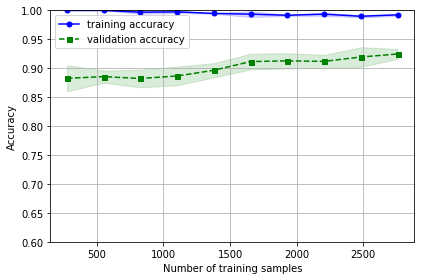

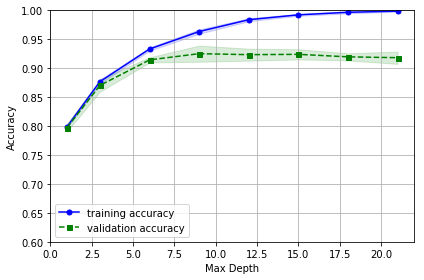

In [11]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_dt,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)

lc_plot(train_sizes, train_scores, test_scores, y_min=0.6, y_max=1.0, 
        x_label='Number of training samples', y_label='Accuracy', save_as='DT/Spambase_DT_lc')

param_range = [1, 3, 6, 9, 12, 15, 18, 21]
train_scores, test_scores = validation_curve(estimator=pipe_dt, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__max_depth', 
                                             param_range=param_range,
                                             cv=5,
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, y_min=0.6, y_max=1.0, 
         x_label='Max Depth', y_label='Accuracy', save_as='DT/Spambase_DT_val')

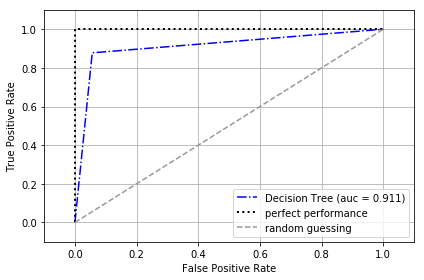

In [12]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='Decision Tree', save_as='DT/Spambase_DT_roc')

#### Neural Network (MLP)

In [43]:
%%time
# Pipeline for multi-layer perceptron classifier
pipe_mlp = Pipeline([('scl', StandardScaler()),
                     ('clf', MLPClassifier(max_iter=600, 
                                           activation='relu', 
                                           solver='adam', 
                                           hidden_layer_sizes=(120,), 
                                           random_state=42))])

pipe_mlp.fit(X_train, y_train)

Wall time: 2.6 s


In [14]:
%%time
y_pred = pipe_mlp.predict(X_test)

Wall time: 5.98 ms


In [15]:
print('Test Accuracy: %.3f' % pipe_mlp.score(X_test, y_test))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# print('Test F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Test Accuracy: 0.957
Test AUC: 0.954


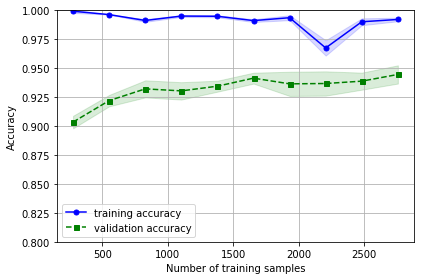

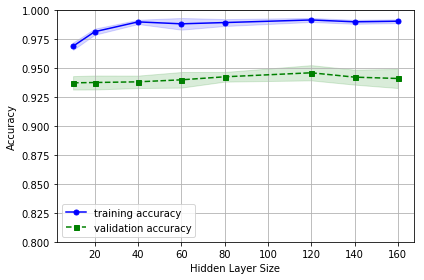

In [16]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_mlp,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
lc_plot(train_sizes, train_scores, test_scores, x_label='Number of training samples', y_label='Accuracy', save_as='NN/Spambase_MLP_lc')

param_range = [10, 20, 40, 60, 80, 120, 140, 160]
train_scores, test_scores = validation_curve(estimator=pipe_mlp, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__hidden_layer_sizes', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='Hidden Layer Size', y_label='Accuracy', save_as='NN/Spambase_MLP_val')

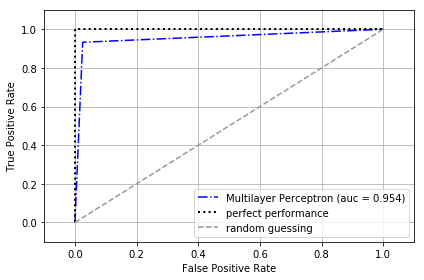

In [17]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='Multilayer Perceptron', save_as='NN/Spambase_MLP_roc')

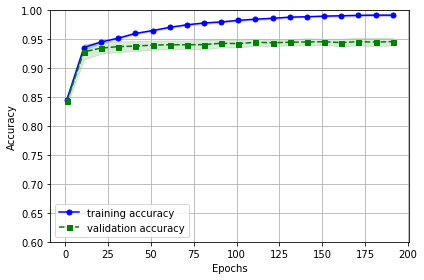

In [52]:
epochs = 200
param_range = [i for i in range(1, epochs+1, 10)]
train_scores, test_scores = validation_curve(estimator=pipe_mlp, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__max_iter', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='Epochs', y_label='Accuracy', y_min=0.6, y_max=1.0, save_as='NN/Spambase_MLP_epochs')

#### Adaptive Boosting

In [13]:
%%time
# Pipeline for adaptive boosting random forest classifier
tree = DecisionTreeClassifier(criterion='entropy', 
                              splitter='best', 
                              max_depth = 6,
                              random_state=42)

pipe_ada = Pipeline([('scl', StandardScaler()),
                     ('clf', AdaBoostClassifier(base_estimator=tree, 
                                                n_estimators=300, 
                                                learning_rate=0.8, 
                                                algorithm='SAMME', 
                                                random_state=42))])

pipe_ada.fit(X_train, y_train)

Wall time: 20.7 s


In [19]:
%%time
y_pred = pipe_ada.predict(X_test)

Wall time: 49.9 ms


In [20]:
print('Test Accuracy: %.3f' % pipe_ada.score(X_test, y_test))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# print('Test F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Test Accuracy: 0.957
Test AUC: 0.953


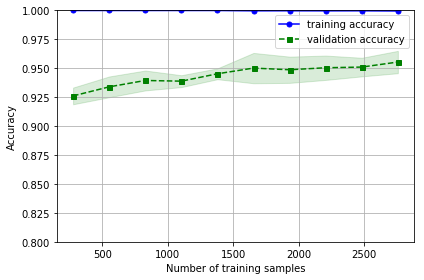

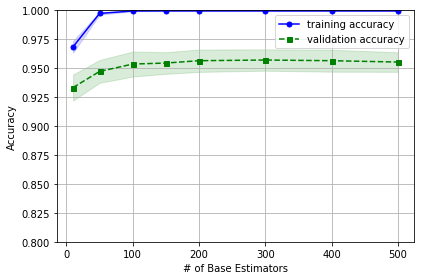

In [21]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_ada,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
lc_plot(train_sizes, train_scores, test_scores, x_label='Number of training samples', y_label='Accuracy', save_as='RT/Spambase_ADA_lc')

param_range = [10, 50, 100, 150, 200, 300, 400, 500]
train_scores, test_scores = validation_curve(estimator=pipe_ada, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__n_estimators', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='# of Base Estimators', y_label='Accuracy', save_as='RT/Spambase_ADA_val')

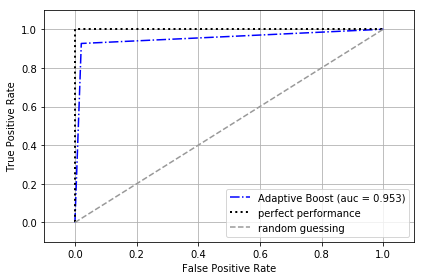

In [22]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='Adaptive Boost', save_as='RT/Spambase_ADA_roc')

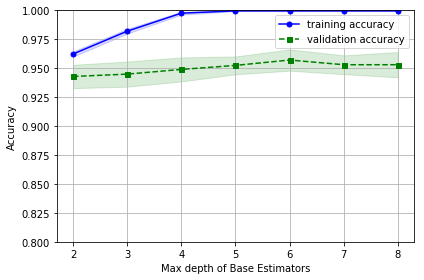

In [16]:
param_range = [2, 3, 4, 5, 6, 7, 8]
train_scores, test_scores = validation_curve(estimator=pipe_ada, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__base_estimator__max_depth',
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='Max depth of Base Estimators', y_label='Accuracy', save_as='EL/Spambase_ADA_val_base')

#### Support Vector Machine

In [45]:
%%time
# Pipeline for support vector machine classifier (using linear kernel)
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(C=10.0, 
                                 kernel='linear', 
                                 gamma='auto', 
                                 decision_function_shape='ovr', 
                                 random_state=42))])

pipe_svm.fit(X_train, y_train)

Wall time: 2.6 s


In [24]:
%%time
y_pred = pipe_svm.predict(X_test)

Wall time: 48.8 ms


In [25]:
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# print('Test F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Test Accuracy: 0.929
Test AUC: 0.922


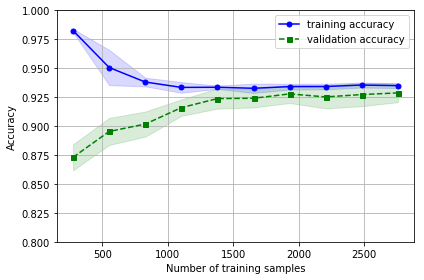

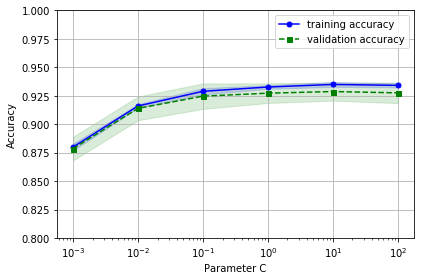

In [26]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svm,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
lc_plot(train_sizes, train_scores, test_scores, x_label='Number of training samples', y_label='Accuracy', save_as='SVM/Spambase_SVC_lc_linear')

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_svm, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__C', 
                                             param_range=param_range,
                                             cv=5,
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='Parameter C', y_label='Accuracy', scale_x=True, save_as='SVM/Spambase_SVC_val_linear')

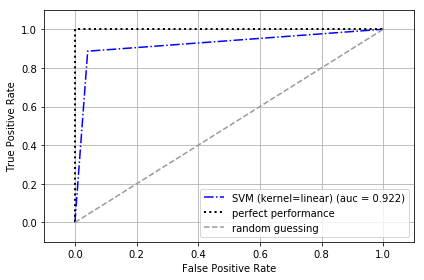

In [27]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='SVM (kernel=linear)', save_as='SVM/Spambase_SVC_roc_linear')

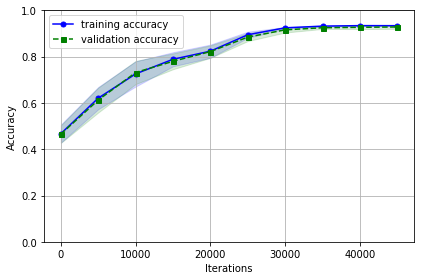

In [51]:
epochs = 50000
param_range = [i for i in range(1, epochs+1, 5000)]
train_scores, test_scores = validation_curve(estimator=pipe_svm, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__max_iter', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='Iterations', y_label='Accuracy', y_min=0.0, y_max=1.0, save_as='SVM/Spambase_SVM_linear_iters')

In [9]:
%%time
# Pipeline for support vector machine classifier (using linear kernel)
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(C=100.0, 
                                 kernel='rbf', 
                                 gamma=0.001, 
                                 decision_function_shape='ovr', 
                                 random_state=42))])

pipe_svm.fit(X_train, y_train)

Wall time: 640 ms


In [29]:
%%time
y_pred = pipe_svm.predict(X_test)

Wall time: 64.8 ms


In [30]:
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# print('Test F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Test Accuracy: 0.945
Test AUC: 0.940


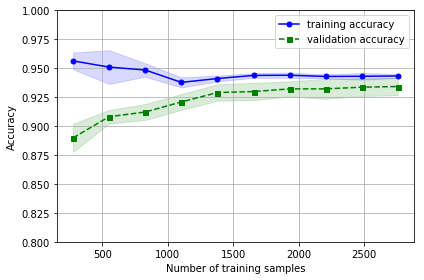

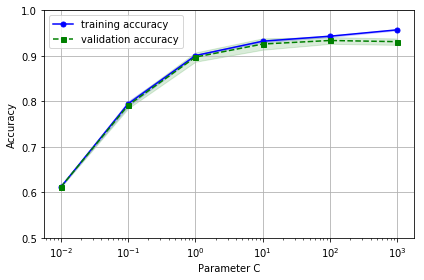

In [31]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svm,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
lc_plot(train_sizes, train_scores, test_scores, x_label='Number of training samples', y_label='Accuracy', save_as='SVM/Spambase_SVC_lc_rbf')

param_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = validation_curve(estimator=pipe_svm, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__C', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, y_min=0.5, y_max=1.0, x_label='Parameter C', y_label='Accuracy', scale_x=True, save_as='SVM/Spambase_SVC_val_rbf')

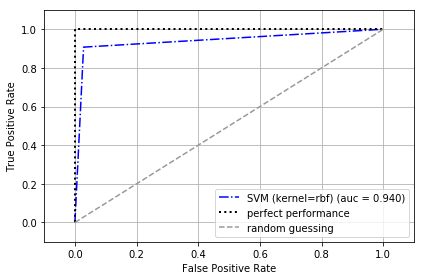

In [32]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='SVM (kernel=rbf)', save_as='SVM/Spambase_SVC_roc_rbf')

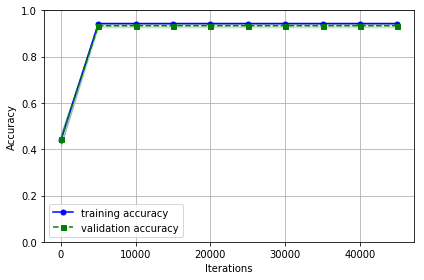

In [10]:
epochs = 50000
param_range = [i for i in range(1, epochs+1, 5000)]
train_scores, test_scores = validation_curve(estimator=pipe_svm, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__max_iter', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='Iterations', y_label='Accuracy', y_min=0.0, y_max=1.0, save_as='SVM/Spambase_SVM_rbf_iters')

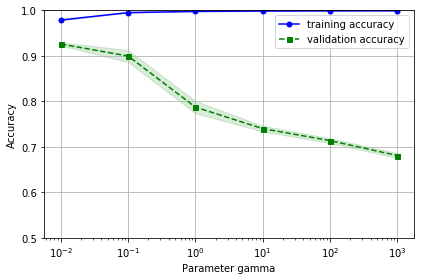

In [11]:
param_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = validation_curve(estimator=pipe_svm, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__gamma', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, y_min=0.5, y_max=1.0, x_label='Parameter gamma', y_label='Accuracy', scale_x=True, save_as='SVM/Spambase_SVC_gamma_rbf')

#### K-Nearest Neighbors

In [33]:
%%time
# Pipeline for k nearest neighbors classifier
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=10, 
                                                  weights='distance', 
                                                  algorithm='auto', 
                                                  p=2))])

pipe_knn.fit(X_train, y_train)

Wall time: 36.9 ms


In [34]:
%%time
y_pred = pipe_knn.predict(X_test)

Wall time: 376 ms


In [35]:
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# print('Test F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Test Accuracy: 0.922
Test AUC: 0.915


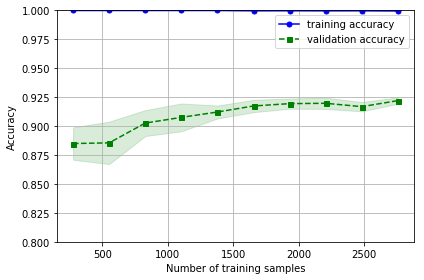

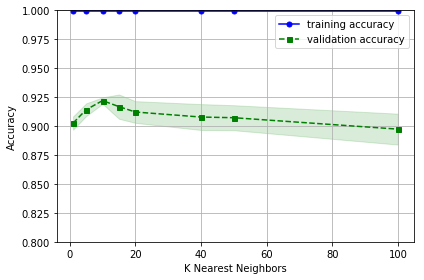

In [36]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_knn,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
lc_plot(train_sizes, train_scores, test_scores, x_label='Number of training samples', y_label='Accuracy', save_as='KNN/Spambase_KNN_lc')

param_range = [1, 5, 10, 15, 20, 40, 50, 100]
train_scores, test_scores = validation_curve(estimator=pipe_knn, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__n_neighbors', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='K Nearest Neighbors', y_label='Accuracy', save_as='KNN/Spambase_KNN_val')

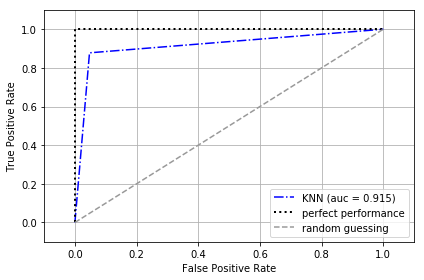

In [37]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='KNN', save_as='KNN/Spambase_KNN_roc')

In [38]:
%%time
# Pipeline for k nearest neighbors classifier
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=5, 
                                                  weights='uniform', 
                                                  algorithm='auto', 
                                                  p=2))])

pipe_knn.fit(X_train, y_train)

Wall time: 28.6 ms


In [39]:
%%time
y_pred = pipe_knn.predict(X_test)

Wall time: 342 ms


In [40]:
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

# confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)

# print('Test F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Test Accuracy: 0.900
Test AUC: 0.893


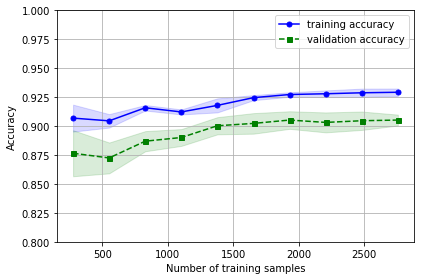

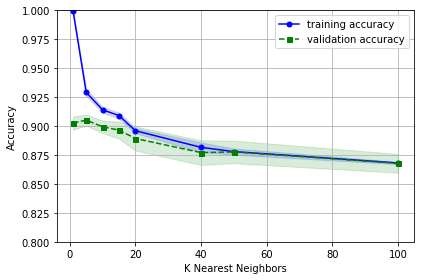

In [41]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_knn,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
lc_plot(train_sizes, train_scores, test_scores, x_label='Number of training samples', y_label='Accuracy', save_as='KNN/Spambase_KNN_uniform_lc')

param_range = [1, 5, 10, 15, 20, 40, 50, 100]
train_scores, test_scores = validation_curve(estimator=pipe_knn, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='clf__n_neighbors', 
                                             param_range=param_range,
                                             cv=5, 
                                             n_jobs=-1)
val_plot(param_range, train_scores, test_scores, x_label='K Nearest Neighbors', y_label='Accuracy', save_as='KNN/Spambase_KNN_uniform_val')

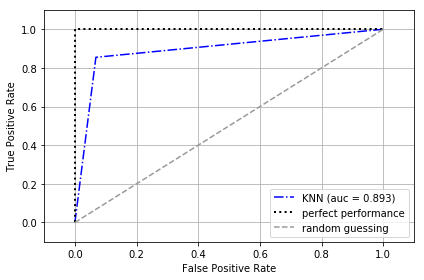

In [42]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='KNN', save_as='KNN/Spambase_KNN_uniform_roc')